# Домашнее задание №4
## **Применение алгоритмов класетризации**
#### Выполнил: Артамонов Д., МАГ ИАД 2020
https://www.kaggle.com/gauravdesurkar/lt-vehicle-loan-default-prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.mixture import GaussianMixture

import os
import numpy as np

%load_ext autoreload
%autoreload 2

Подгружаем наши данные и не забываем применить нормализацию

In [2]:
import loan_dataset

In [3]:
data_path = 'VehicleLoanDefaultPrediction'
dataset = loan_dataset.VehicleLoanDataset(os.path.join(data_path, 'train.csv'), balance=False,  normalize=True, mode='train', test_size=0.1)
X_train, y_train = dataset.X_train, dataset.y_train.reshape(-1,)
X_train = normalize(X_train)
print(f'Размер выборки {X_train.shape[0]} , число признаков:{ X_train.shape[1]}')

Размер выборки 91099 , число признаков:35


Будем работать только с матрицей для тренировки. Прогоним алгоритмы кластеризации и посмотрим, насколько похожи лейблы кластеров на метки классов

## K-means

In [10]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)

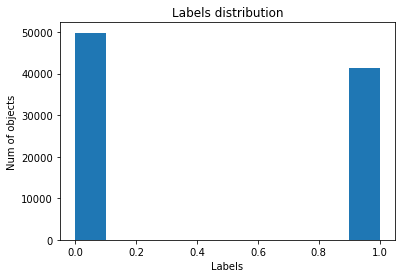

In [11]:
plt.hist(kmeans.labels_)  # density=False would make counts
plt.ylabel('Num of objects')
plt.xlabel('Labels');
plt.title("Labels distribution");
plt.show()

In [12]:
print(f'Число объектов в первом кластере: {kmeans.labels_.sum()}, во втором: {len(kmeans.labels_) - kmeans.labels_.sum()}')

Число объектов в первом кластере: 41274, во втором: 49825


Алгоритм разбил наши объекты на два похожих по размеру кластера

Сравним с метками классов:

In [13]:
cluster_labels = kmeans.labels_

In [14]:
difference = np.abs(y_train - cluster_labels).sum() 
difference_rel = np.abs(y_train - cluster_labels).sum() / len(cluster_labels)

In [15]:
print(f'Из  {X_train.shape[0]} объектов метки классов и кластеров не совпадают у {int(difference)} объектов')
print(f'У {(1 - difference_rel) * 100:.2f}%  объектов совпадают метки классов и кластеров')

Из  91099 объектов метки классов и кластеров не совпадают у 44527 объектов
У 51.12%  объектов совпадают метки классов и кластеров


Получается, что разбиение на кластеры произошло не по нашему "целевому" признаку

Посмотрим на центры кластеров и на значения признаков некоторого объекта из выборки:

In [16]:
cc = kmeans.cluster_centers_

In [70]:
centers_and_object = pd.DataFrame(
    np.concatenate( 
        ( 
            cc,
            (cc[0] - cc[1]).reshape(1,-1),
            X_train[42].reshape(1,35)
        )
    ),
    columns = dataset.data.columns[:-1]
).transpose()
centers_and_object.columns = ['cluster1', 'cluster2', 'difference', 'some object']

In [71]:
centers_and_object*1000

,cluster1,cluster2,difference,some object
disbursed_amount,0.002304,0.001724,0.000580,-0.000295
asset_cost,0.000127,-0.002111,0.002238,-0.006409
ltv,0.003243,0.005892,-0.002649,-0.003561
branch_id,3.497627,3.986240,-0.488613,1.415129
supplier_id,998.578954,990.922859,7.656095,990.873575
manufacturer_id,3.601772,3.587820,0.013952,6.085056
Date.of.Birth,0.001836,0.000282,0.001554,0.015160
Employment.Type,0.031156,0.033183,-0.002027,0.070756
Employee_code_ID,41.085984,128.067069,-86.981084,134.649558
MobileNo_Avl_Flag,0.051637,0.052951,-0.001313,0.070756


После нормализации признаков сложно понять, какими признаками обладают представители обоих кластеров, даже в сравнении с некоторым объектом из выборки. Однако, можно увидеть, по каким признакам центры "дальше" всего друг от друга. Например по призакам 'Employee_code_ID'или 'PRI.NO.OF.ACCTS'

## DBSAN

Посмотрим на среднее евклидово расстояние между векторами объектов в нашей выборке:

In [4]:
mean_dist = euclidean_distances(X_train[0:1000]).mean()

In [5]:
print(f'Среднее расстояние: {mean_dist}')

Среднее расстояние: 0.06556355935423391


Отталкиваясь от него, мы можем выбрать параметр eps

In [30]:
random_subset = np.random.choice(np.arange(X_train.shape[0]), size=20_000, replace=False)
X_subet = X_train[random_subset]

Обучим несколько моделей и посмотрим, как влияют параметры

In [40]:
labels_dict = {}

In [41]:
for eps, min_samples in [(0.06, 2), (0.06, 10), (0.001, 2), (0.001, 10) ]:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_subet)
    labels_dict[(eps, min_samples)] = dbscan.labels_

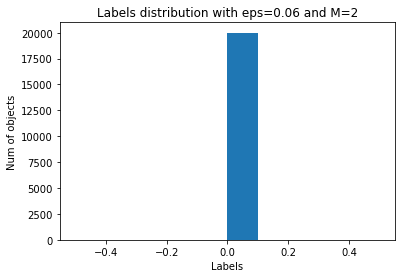

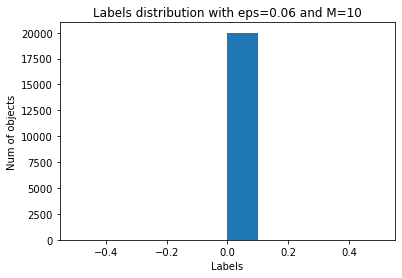

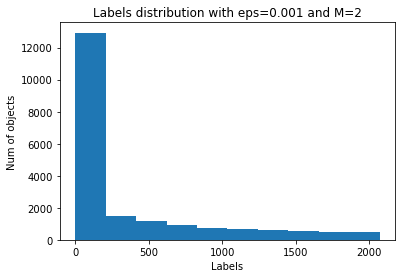

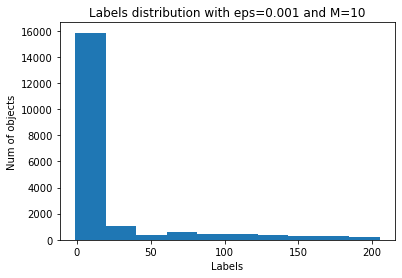

In [45]:
for (eps, m), labels in labels_dict.items():
    plt.hist(labels)  # density=False would make counts
    plt.ylabel('Num of objects')
    plt.xlabel('Labels');
    plt.title(f'Labels distribution with eps={eps} and M={m}');
    plt.show()

Видно, что точки "не спешат отделяться" от главного кластера. Попробуем ещё уменьшить $ \epsilon $

In [46]:
labels_dict = {}
for eps, min_samples in [(0.0001, 2), (0.0001, 10), (0.00001, 2), (0.00001, 10) ]:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_subet)
    labels_dict[(eps, min_samples)] = dbscan.labels_

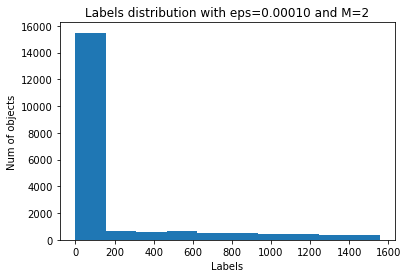

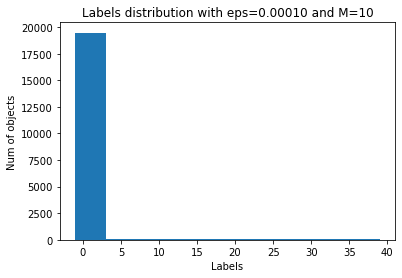

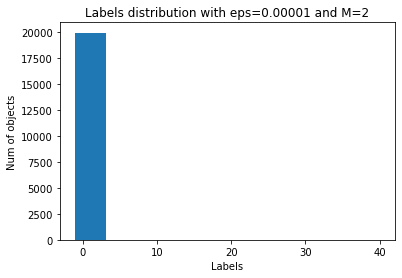

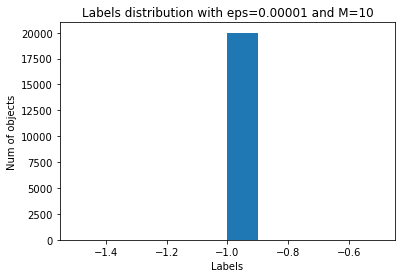

In [49]:
for (eps, m), labels in labels_dict.items():
    plt.hist(labels)  # density=False would make counts
    plt.ylabel('Num of objects')
    plt.xlabel('Labels');
    plt.title(f'Labels distribution with eps={eps:.5f} and M={m}');
    plt.show()

При очень маленьком расстоянии кластера не получилось вообще. Попробуем взять $ \epsilon = 0.001 $ и рассмотреть различные значения $M$

In [50]:
labels_dict = {}
for eps, min_samples in [(0.001, 1), (0.001, 2), (0.001, 5), (0.001, 10), (0.001, 20), (0.001, 50), (0.001, 100)]:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_subet)
    labels_dict[(eps, min_samples)] = dbscan.labels_

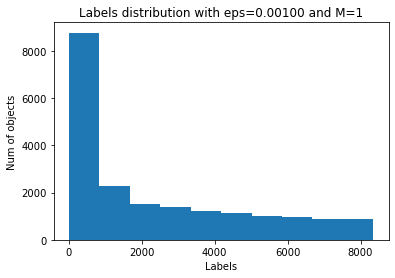

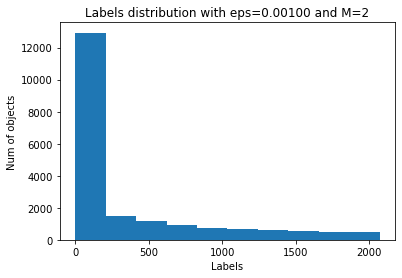

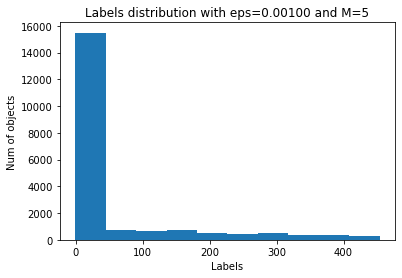

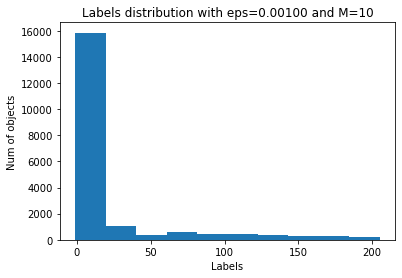

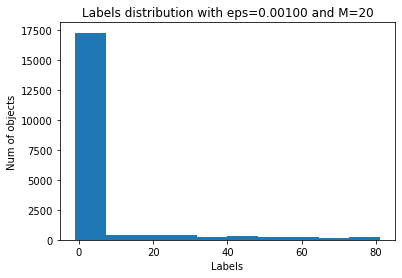

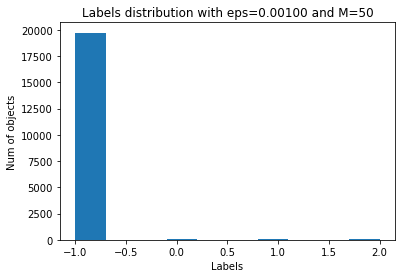

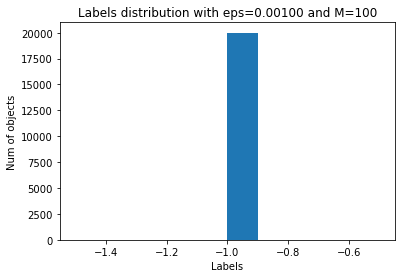

In [51]:
for (eps, m), labels in labels_dict.items():
    plt.hist(labels)  # density=False would make counts
    plt.ylabel('Num of objects')
    plt.xlabel('Labels');
    plt.title(f'Labels distribution with eps={eps:.5f} and M={m}');
    plt.show()

Самое наглядное из полученных разбений получилось при параметрах (0.001, 1), то есть достаточно всего одного соседа на небольшом расстоянии, чтобы попасть в кластер. Но даже при этом, выделяется один большой кластер. С увеличением необходимого числа соседей $ M $, кластер собирает в себя всё больше объектов

## EM (Gaussian Mixture)


Попробуем использовать EM алгоритм, имлементированный в моделе [GaussianMixture](https://scikit-learn.org/stable/modules/mixture.html#mixture)

In [6]:
random_subset = np.random.choice(np.arange(X_train.shape[0]), size=20_000, replace=False)
X_subet = X_train[random_subset]
y_subset = y_train[random_subset]

In [69]:
em = GaussianMixture(n_components=10).fit(X_subet)

In [71]:
em.predict(X_subet)

array([8, 8, 8, ..., 2, 4, 3])

In [73]:
l_dict = {}
for n in range(1,10):
    em = GaussianMixture(n_components=n).fit(X_subet)
    labels = em.predict(X_subet)
    l_dict[n] = labels

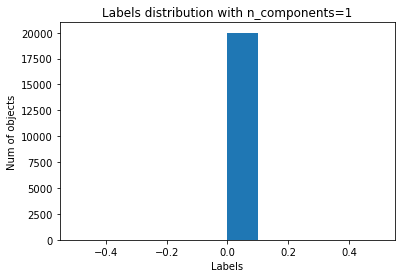

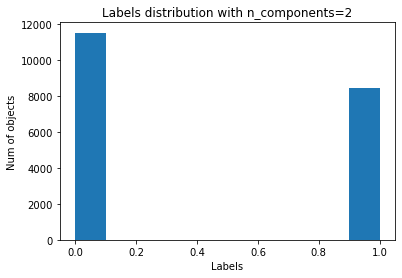

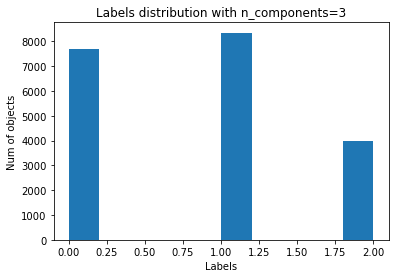

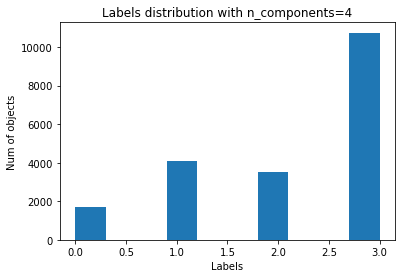

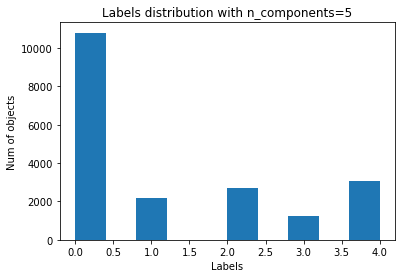

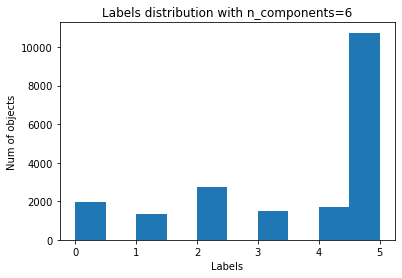

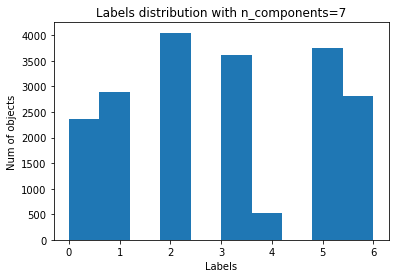

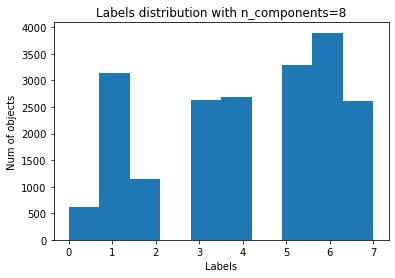

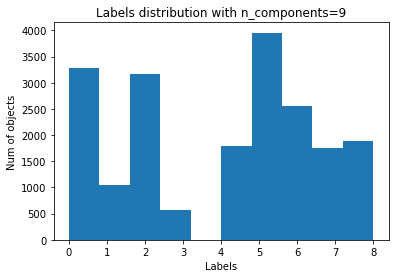

In [75]:
for n, labels in l_dict.items():
    plt.hist(labels)
    plt.ylabel('Num of objects')
    plt.xlabel('Labels');
    plt.title(f'Labels distribution with n_components={n}');
    plt.show()

Рассмотрим модель с двумя компонентами

In [7]:
em = GaussianMixture(n_components=2).fit(X_subet)
labels = em.predict(X_subet)

In [8]:
labels

array([0, 1, 1, ..., 1, 0, 1])

In [10]:
difference = np.abs(y_subset - labels).sum() 
difference_rel = np.abs(y_subset - labels).sum() / len(labels)

In [12]:
print(f'Из  {X_subet.shape[0]} объектов метки классов и кластеров не совпадают у {int(difference)} объектов')
print(f'У {(1 - difference_rel) * 100:.2f}%  объектов совпадают метки классов и кластеров')

Из  20000 объектов метки классов и кластеров не совпадают у 10290 объектов
У 48.55%  объектов совпадают метки классов и кластеров


EM ожидаемо также не разбил по ключевому признаку

In [18]:
centers_and_object = pd.DataFrame(
        em.means_
    ,
    columns = dataset.data.columns[:-1]
).transpose()
centers_and_object.columns = ['cluster1', 'cluster2']

In [21]:
centers_and_object * 1000

,cluster1,cluster2
disbursed_amount,0.001500,0.003167
asset_cost,-0.002253,0.000496
ltv,0.005710,0.003901
branch_id,4.042221,3.453087
supplier_id,990.690596,998.421192
manufacturer_id,3.588016,3.617723
Date.of.Birth,-0.000181,0.001827
Employment.Type,0.033323,0.030958
Employee_code_ID,129.847614,43.492937
MobileNo_Avl_Flag,0.053037,0.051694


Центры выглядят очень похожими на центры кластеров в Kmeans

## Вывод

Разбиения на кластеры, построенные с исползованных алгоритмов, имеют мало общего с бинарные разбиением по предсказываемому (или ключевому) признаку: loan_default